## Final Project Submission

Please fill out:
* Student name: Matthew Daly
* Student pace: part time 
* Scheduled project review date/time: TBA
* Instructor name: Eli
* Blog post URL: TBA

In [1]:
# import libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

## Applying the OSEMN process I am going to explore and model the King's County house sales data set

### Step one: Obtain

In [2]:
#read in data from csv file
df = pd.read_csv('kc_house_data.csv')

In [3]:
#check data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Step 2: Scrub

### missing data and placeholders

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In looking at this information one glaring outlier/error stands out right away - max bedrooms 33.

In [5]:
# remove obvious error
df = df.drop(df['bedrooms'].idxmax())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


 There appears to be data missing from waterfront, view and yr_renovated. Also it is odd that sqft_basement is type  
object and not int64 like the other sqft variables. 

In [7]:
# explore NaNs
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront does have a significant amount of NaNs. Though, in looking at the value_counts, only 0.8 percent of the data set with known waterfront values are waterfront properties. As I do not wish to lose other pertinent data from these rows, I will change the NaNs to non-waterfront, confident this will not have a negative effect on the data.



In [8]:
# change waterfront NaNs to 0.0
df['waterfront'] = df['waterfront'].replace(np.nan, 0)


Create new column has_waterfront

In [10]:
#create new column
df['has_waterfront'] = pd.Series(len(df['waterfront']), index=df.index)
df['has_waterfront'] = 0
df.loc[df['waterfront']>0, 'has_waterfront'] = 1

As the number of NaNs for view is minor, I will drop these rows.

In [13]:
df = df[pd.notnull(df['view'])]
df['view'].isna().sum()

0

In the case of yr_renovated things are not as clear. First, the amount of NaN's in significant, being
almost 18% of the data. Also, they are dates, not continuous or categorical data, which makes filling with mean/median or a new category, problematic. The vast majority of the know values in this column are 0 value - 80%.

I am not confident in this data column, but want to retain the row data, so I will make a new column 'has_been_renovated' and drop the sqft_basemen column.   


In [14]:
#create new column
df['has_been_renovated'] = pd.Series(len(df['yr_renovated']), index=df.index)
df['has_been_renovated'] = 0
df.loc[df['yr_renovated']>0, 'has_been_renovated'] = 1

In [15]:
# drop column 'yr_renovated'
df = df.drop(['yr_renovated'], axis=1)

In the sqft_basement column, '?'s are being used as place holders. I will replace these with the median of the column. 

In [17]:
# # replace '?' with median of sqft_basement
df['sqft_basement'] = df['sqft_basement'].replace('?', 0)
df['sqft_basement'] = df['sqft_basement'].astype(float)

I am also going to make a new column 'has_basement' as it might be come relevant in later 
modeling.  


In [18]:
#create new column
df['has_basement'] = pd.Series(len(df['sqft_basement']), index=df.index)
df['has_basement'] = 0
df.loc[df['sqft_basement']>0, 'has_basement'] = 1

In [19]:
# In normalization the view column was giving me problems due to the 0 values. 
# So I am going to create a new column has_view:
df['has_view'] = pd.Series(len(df['view']), index=df.index)
df['has_view'] = 0
df.loc[df['view']>0, 'has_view'] = 1

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_waterfront', 'has_been_renovated',
       'has_basement', 'has_view'],
      dtype='object')

I am also going to make age column, and a year column instead of date.

In [21]:
df['age'] = df['yr_built'].apply( lambda x: 2016 - x)

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_waterfront,has_been_renovated,has_basement,has_view,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,0,0,0,0,61
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,0,1,1,0,65
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0,0,0,0,83
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0,0,1,0,51
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0,0,0,0,29


### multicollinearity

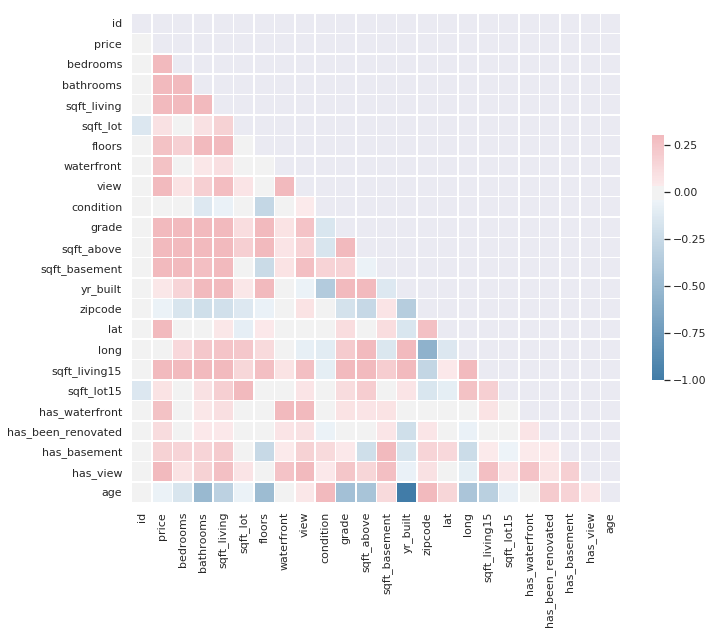

In [23]:
#correlation matrix study
sns.set(style="dark")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

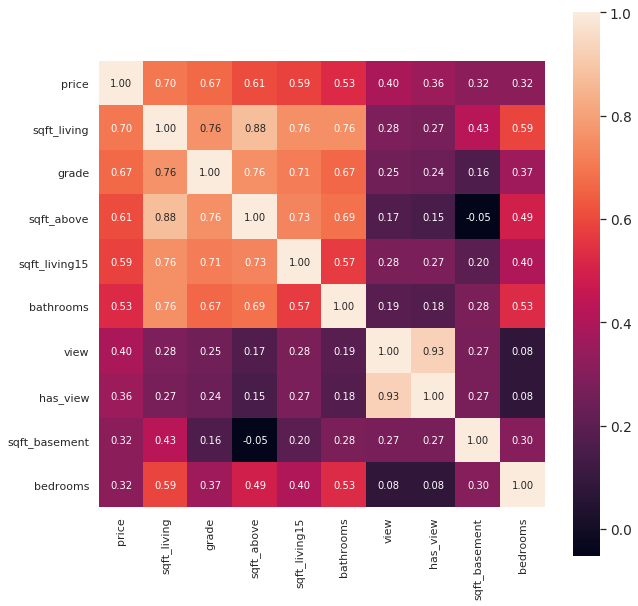

In [24]:
# price correlation matrix
k = 10
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()



I'm setting .75 as my correlation therhold. I have identifity sqft_living as my variable with the greatest corrleation with price, I see a lot of correlation between sqft_living, sqft_living15, sqft_above, bathrooms and grade. This makes sense as they are basically dealing with general space (except for grade). Due to this I will drop them. 


In [25]:
# # drop sqft_living, sqft_above
# df = df.drop(['sqft_living15'], axis=1)
# df = df.drop(['sqft_above'], axis=1)
# df = df.drop(['bathrooms'], axis=1)
# df = df.drop(['grade'], axis=1)

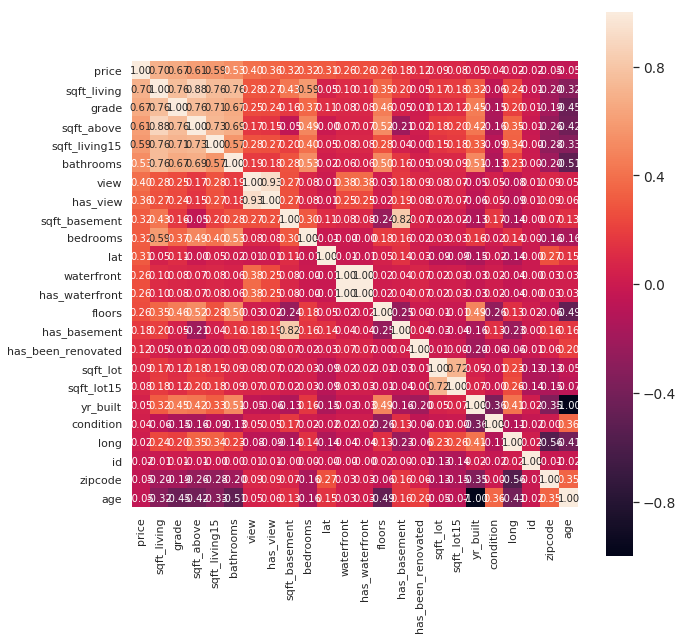

In [26]:
# rerun correlation matrix 
corr = df.corr()
k = 25
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Remove outliers

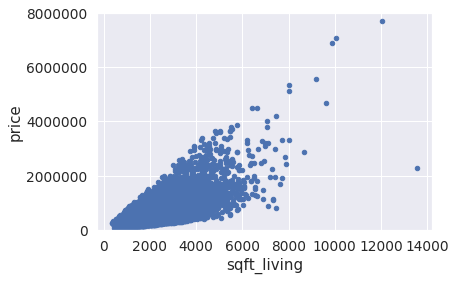

In [27]:
# Bivariate analysis price/sqft_living
var = 'sqft_living'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000))


In [28]:
df.sort_values(by = 'sqft_living', ascending=False)[:1]
# I am going to remove this one, because it alone doesn't seem to be following the trend
df = df.drop(df[df['id'] == 1225069038].index)

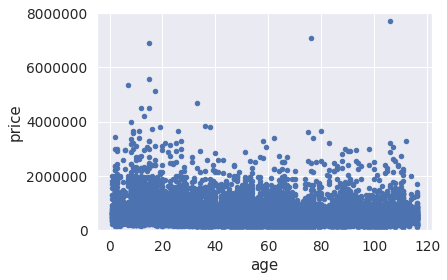

In [29]:
# Bivariate analysis price/sqft_living
var = 'age'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000))


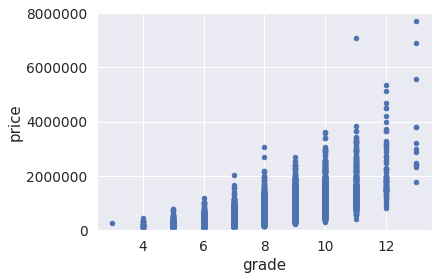

In [30]:
# Bivariate analysis price/grade
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0, 8000000))



In [31]:
# I don't like that one grade 11 that is hovering above 7m, it breaks the curve, so I will remove it
df_test_grade = df[df['grade'] == 11]
df_test_grade.sort_values(by = 'price', ascending=False)[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_waterfront,has_been_renovated,has_basement,has_view,age
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,98004,47.6500,-122.214,3930,25449,1,1,1,1,76
2083,8106100105,11/14/2014,3850000.0,4,4.25,5770,21300,2.0,1.0,4.0,...,98040,47.5850,-122.222,4620,22748,1,0,0,1,36
6502,4217402115,4/21/2015,3650000.0,6,4.75,5480,19401,1.5,1.0,4.0,...,98105,47.6515,-122.277,3510,15810,1,0,1,1,80
15241,2425049063,9/11/2014,3640000.0,4,3.25,4830,22257,2.0,1.0,4.0,...,98039,47.6409,-122.241,3820,25582,1,0,0,1,26
5874,2525049148,10/7/2014,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,98039,47.6209,-122.237,3160,17825,0,0,0,0,2


In [32]:
df = df.drop(df[df['id'] == 9808700762].index)

### Normalize Data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a257223c8>,
      dtype=object)

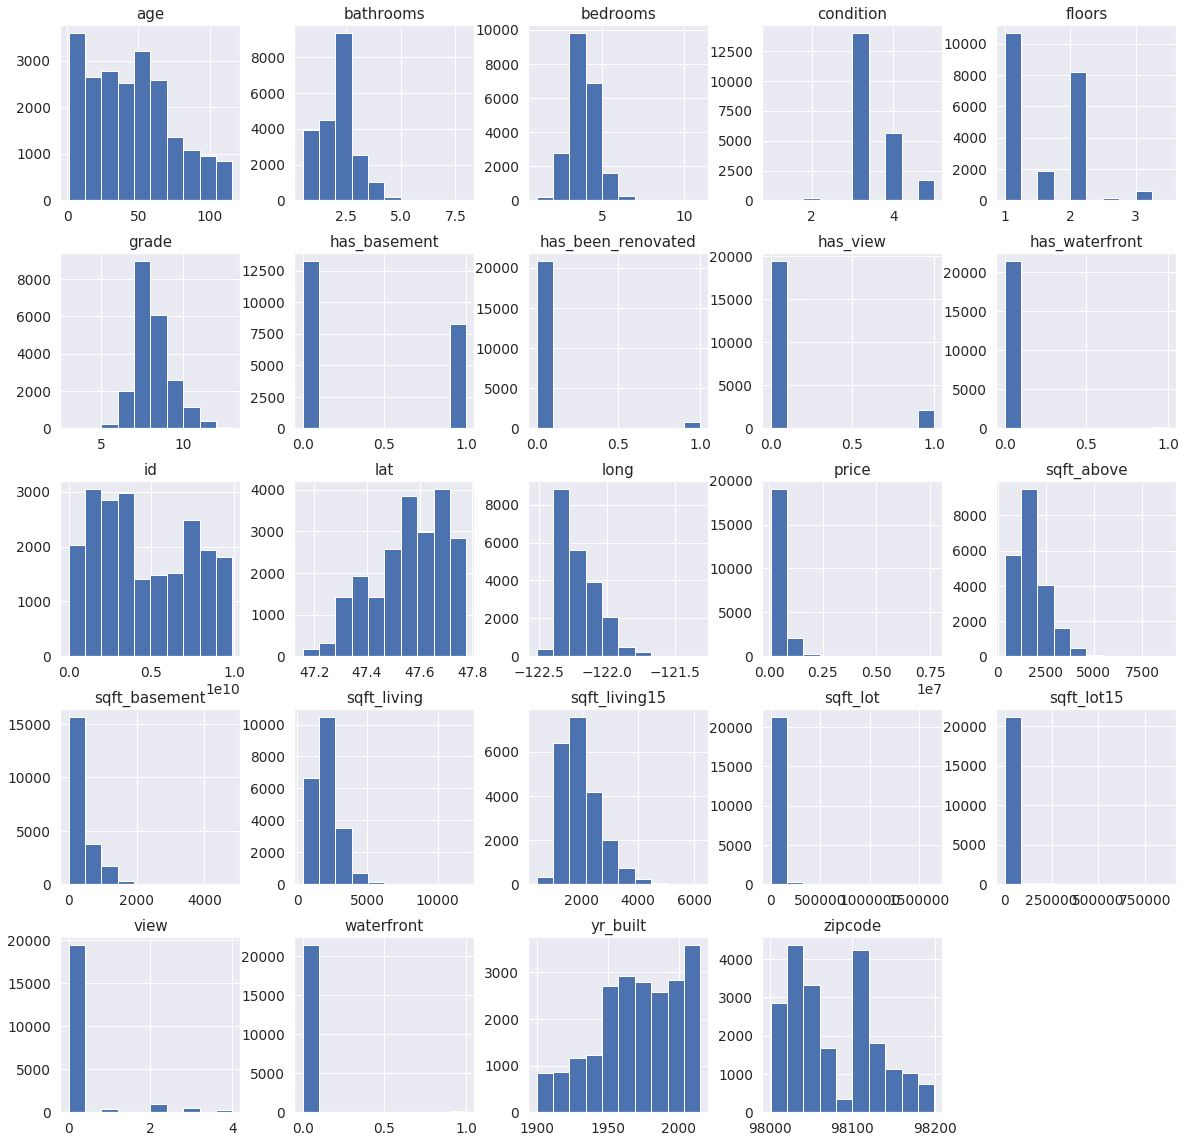

In [33]:
df.hist(figsize = [20, 20])

In [34]:
# sqft_basement is giving -inf values due to 0 values, after spliting the df to look at total sqft of basement
# on price, I am droping this column as being proplomatic 
df = df.drop(['sqft_basement'], axis=1)

In [35]:
df_continuous_data = ['price', 'sqft_living', 'sqft_lot','sqft_lot15', 'lat', 'long', 'grade', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_above', 'yr_built', 'zipcode', 'long', 'age', 'condition', 'waterfront', 'floors']

for col in df_continuous_data:
    df[col] = np.log(df[col])

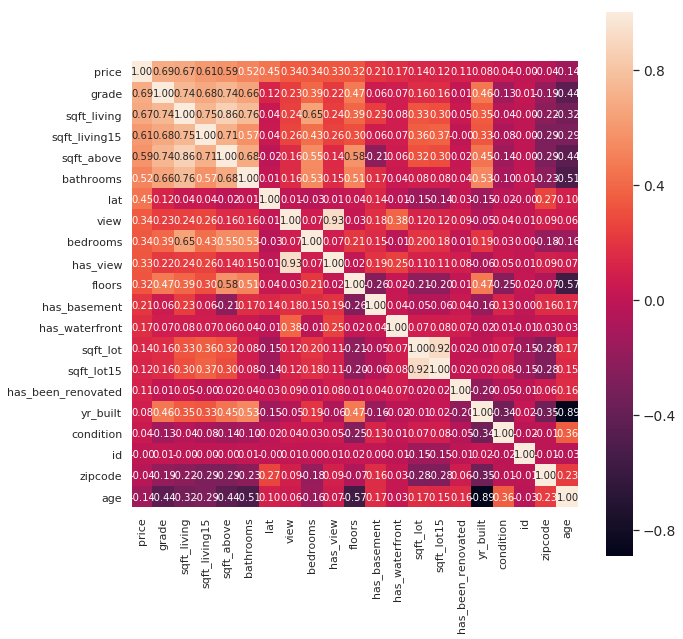

In [36]:
# rerun correlation matrix 
corr = df.corr()
k = 27
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Recheck for normality

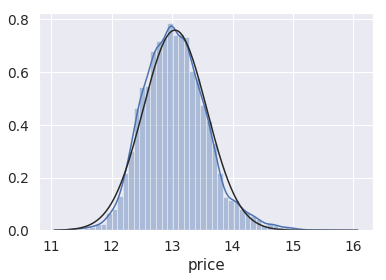

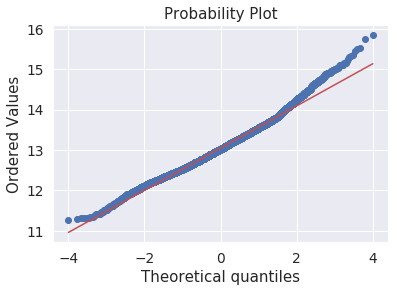

In [37]:
# transformed hist and prob plot price
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

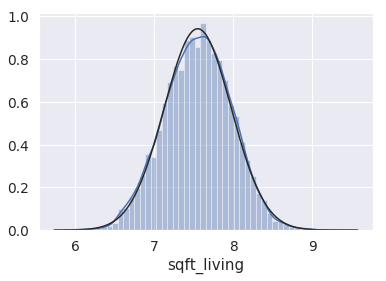

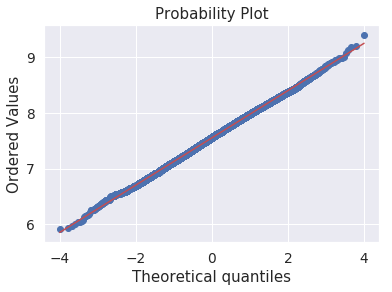

In [38]:
# check sqrt_living
sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

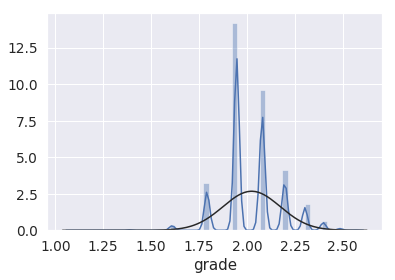

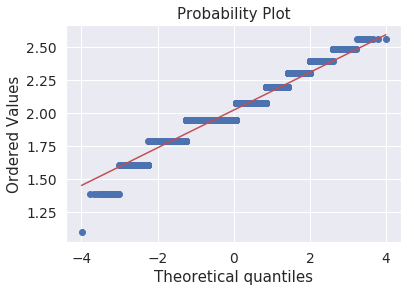

In [39]:
# check with sqrt_living
sns.distplot(df['grade'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['grade'], plot=plt)

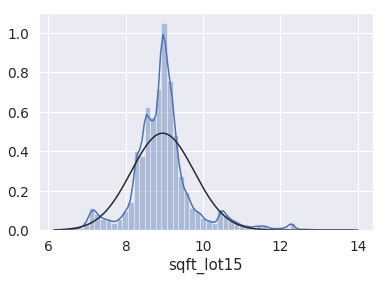

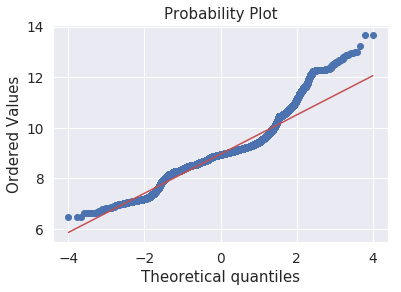

In [40]:
# check with sqrt_living
sns.distplot(df['sqft_lot15'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_lot15'], plot=plt)

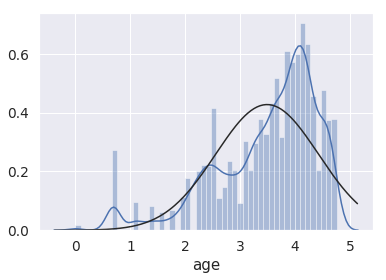

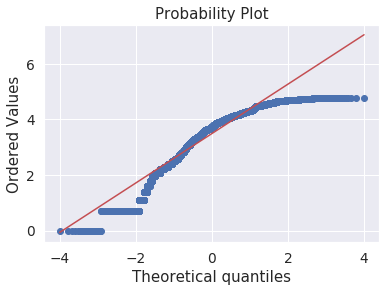

In [41]:
sns.distplot(df['age'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)

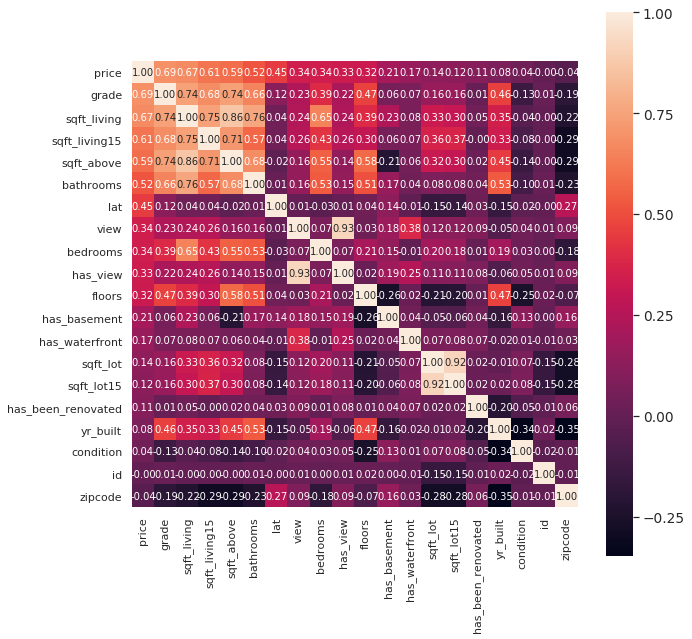

In [42]:
# rerun correlation matrix 
corr = df.corr()
k = 20
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Even after normalization both sqft_lot and sqft_lot15 are problematic, I will drop them. 

In [43]:
#drop sqft_lot and sqft_lot15
# df = df.drop(['sqft_lot', 'sqft_lot15'], axis=1)


Transforming catagorical variables

In [44]:
# bedroom_dummies = pd.get_dummies(df['bedrooms'], prefix='bed')
# bathroom_dummies = pd.get_dummies(df['bathrooms'], prefix='bath')
# floors_dummies = pd.get_dummies(df['floors'], prefix='floors')
# view_dummies = pd.get_dummies(df['view'], prefix='view')
# yr_built_dummies = pd.get_dummies(df['yr_built'], prefix='yr_built')
# zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')
# condition_dummies = pd.get_dummies(df['condition'], prefix='cond')
# grade_dummies = pd.get_dummies(df['grade'], prefix='grade')

In [45]:
# df = df.drop(['bedrooms', 'bathrooms','floors', 'view', 'condition', 'grade','yr_built', 'zipcode'], axis=1)

In [46]:
# df = pd.concat([df, bedroom_dummies, bathroom_dummies, floors_dummies, view_dummies, yr_built_dummies, zipcode_dummies, condition_dummies, grade_dummies], axis=1)

In [47]:
# df.head()

Modeling

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [49]:
# for cat_names in df.iloc[:,7:].columns:
#          df[cat_names] = df[cat_names].astype('category')

In [50]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_waterfront,has_been_renovated,has_basement,has_view,age
count,2.153100e+04,21531.000000,21531.000000,21531.000000,21531.000000,21531.000000,21531.000000,2.153100e+04,21531.000000,21531.000000,...,21531.000000,21531.000000,0.0,21531.000000,21531.000000,21531.000000,21531.000000,21531.000000,21531.000000,21531.000000
mean,4.582365e+09,13.047825,1.177590,0.677490,7.550355,8.989364,0.338440,-inf,0.233617,1.209754,...,11.493518,3.861991,NaN,7.539273,8.960349,0.006688,0.034462,0.384608,0.097998,3.489248
std,2.876630e+09,0.525900,0.282765,0.392338,0.423823,0.901925,0.352280,NaN,0.765213,0.181305,...,0.000546,0.002915,NaN,0.327368,0.812262,0.081508,0.182417,0.486514,0.297319,0.934018
min,1.000102e+06,11.264464,0.000000,-0.693147,5.913503,6.253829,0.000000,-inf,0.000000,0.000000,...,11.492733,3.853459,NaN,5.988961,6.478510,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123375e+09,12.682307,1.098612,0.559616,7.265430,8.525161,0.000000,-inf,0.000000,1.098612,...,11.493059,3.860122,NaN,7.306531,8.536996,0.000000,0.000000,0.000000,0.000000,2.944439
50%,3.904950e+09,13.017003,1.098612,0.810930,7.554859,8.938138,0.405465,NaN,0.000000,1.098612,...,11.493386,3.862242,NaN,7.517521,8.938532,0.000000,0.000000,0.000000,0.000000,3.713572
75%,7.312150e+09,13.377006,1.386294,0.916291,7.843849,9.276690,0.693147,-inf,0.000000,1.386294,...,11.493926,3.864472,NaN,7.766417,9.218606,0.000000,0.000000,1.000000,0.000000,4.174387
max,9.900000e+09,15.856731,2.397895,2.079442,9.396820,14.317109,1.252763,0.000000e+00,4.000000,1.609438,...,11.494751,3.866557,NaN,8.733916,13.677627,1.000000,1.000000,1.000000,1.000000,4.753590


In [51]:
# 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_wterfront',
#        'has_basement'

In [59]:
model = 'price ~  sqft_living + grade + yr_built + lat'
# + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement, yr_built, yr_renovated, zipcode, lat + long + sqft_living15 + sqft_lot15 + has_waterfront + has_basement'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.417e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:50:44   Log-Likelihood:                -2825.9
No. Observations:               21531   AIC:                             5662.
Df Residuals:                   21526   BIC:                             5702.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -177.8614      3.025    -58.788      0.000    -183.791    -171.931
sqft_living     0.4888      0.007     73.437      0.000       0.476       0.502
grade           1.6269      0.020     79.993      0.000       1.587       1.667
yr_built       -7.7303      0.146    -53.065      0.000      -8.016      -7.445
lat            62.8091      0.669     93.879      0.000      61.498      64.120
==============================================================================
Omnibus:                      898.022   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1735.453
Skew:                           0.315   Prob(JB):                         0.00
Kurtosis:                       4.240   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Validation

In [77]:
X = df[['sqft_living', 'grade', 'yr_built',  'lat']]
y = pd.DataFrame(df.price, columns=['price'])

,sqft_living,grade,yr_built,lat
0,7.073270,1.945910,7.578145,3.860965
1,7.851661,1.945910,7.576097,3.865372
2,6.646391,1.791759,7.566828,3.865726
3,7.580700,1.945910,7.583248,3.861168
4,7.426549,2.079442,7.594381,3.863186
5,8.597851,2.397895,7.601402,3.864011
6,7.447168,1.945910,7.598399,3.856715
8,7.484369,1.945910,7.580700,3.860989
9,7.544332,1.945910,7.602401,3.857955
10,8.177516,2.079442,7.583248,3.862847


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16148 5383 16148 5383


In [68]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [69]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [72]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.07536230168043849
Test Mean Squarred Error: 0.07848602454438747


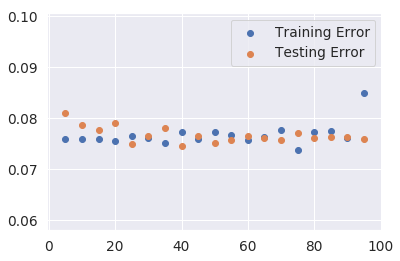

In [75]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

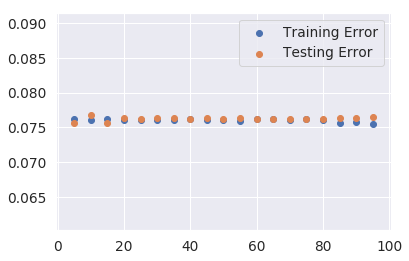

In [76]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()